# Building Trees using scikit-learn - Lab

## Introduction
Following the toy example we saw in the previous lesson, we shall now grow a decision tree for a more complex dataset. This lab covers all major areas of standard machine learning practice, from data acquisition to evaluation of results. We shall use scikit learn, pandas and graphviz libraries to conduct this analysis following the example of play tennis dataset.

## Objectives

You will be able to:

- Use pandas to prepare the data for the scikit-learn decision tree algorithm
- Train the classifier with a training dataset and evaluate performance using different measures
- Visualize the decision tree and interpret the visualization

## UCI Banknote Authentication Data Set

In this lab we shall work with a popular dataset for classification called the ["UCI Bank Note Authentication Dataset'](https://archive.ics.uci.edu/ml/datasets/banknote+authentication). This Data were extracted from images that were taken from genuine and forged banknote-like specimens. The notes were first digitized, followed by a numerical transformation using DSP techniques. The final set of engineered features are all continuous in nature (visit the UCI link to learn about feature engineering in detail). 

We have following attributes in the dataset. 

1. __Variance__ of Wavelet Transformed image (continuous) 
2. __Skewness__ of Wavelet Transformed image (continuous) 
3. __Curtosis__ of Wavelet Transformed image (continuous) 
4. __Entropy__ of image (continuous) 
5. __Class__ (integer) - Target/Label 

## Step 1: Import necessary Libraries
- Import necessary libraries as we saw in previous lesson

In [1]:
# Import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pandas as pd 
import numpy as np

## Step 2: Import Data
- Read the file `"data_banknote_authentication.csv"` as a pandas dataframe. Note that there is no header information in this dataset.
- Assign column names 'Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class' to dataset in the given order.
- View the basic statistics and shape of dataset.
- Check for frequency of positive and negative examples in the target variable

In [2]:
# Create Dataframe

df = pd.read_csv('data_banknote_authentication.csv', 
            header=None, 
            names=['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'])
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
# Describe the dataset

df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [4]:
# Shape of dataset

df.shape

(1372, 5)

In [5]:
# Class frequency of target variable 

df.Class.value_counts()

0    762
1    610
Name: Class, dtype: int64

There are slightly more 0's than 1's, so target variable is relatively well balanced.



## Step 3: Create Features and Labels, Training and Test Data

So now we need to create our feature set X and labels y. 
- Create X and y by selecting the appropriate columns from the dataset
- Create a 80/20 split on the dataset for training/testing. Use random_state=10 for reproducibility

In [6]:
# Create features and labels

X = df.drop(columns=['Class'])
y = df['Class']

In [7]:
# Perform an 80/20 split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

## Step 4: Train the Classifier and Make PRedictions
- Create an instance of decision tree classifier with random_state=10 for reproducibility
- Fit the traiing data to the model 
- USe the trained model to make predictions with test data

In [8]:
# Train a DT classifier

clf = DecisionTreeClassifier(random_state=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [9]:
# Make predictions for test data

y_pred = clf.predict(X_test)

## Step 5: Check Predictive Performance

We can now use different evaluation measures to check the predictive performance of the classifier. 
- Check the accuracy , AUC and create a confusion matrix 
- Interpret the results 

In [10]:
accuracy = accuracy_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)

print(f'Accuracy Score: {accuracy:.4f}')
print(f'AUC Score: {auc_score:.4f}')
print('\nConfusion Matrix\n----------------')

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy Score: 0.9782
AUC Score: 0.9779

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,149,3,152
1,3,120,123
All,152,123,275


The results indicate that the decision tree is a very strong predictor of the target variable. High Accuracy and AUC scores, with very few false positives and false negatives.

## Step 6: Visualize the tree 

- Use graphviz to visualize the tree 
- Interpret the results 

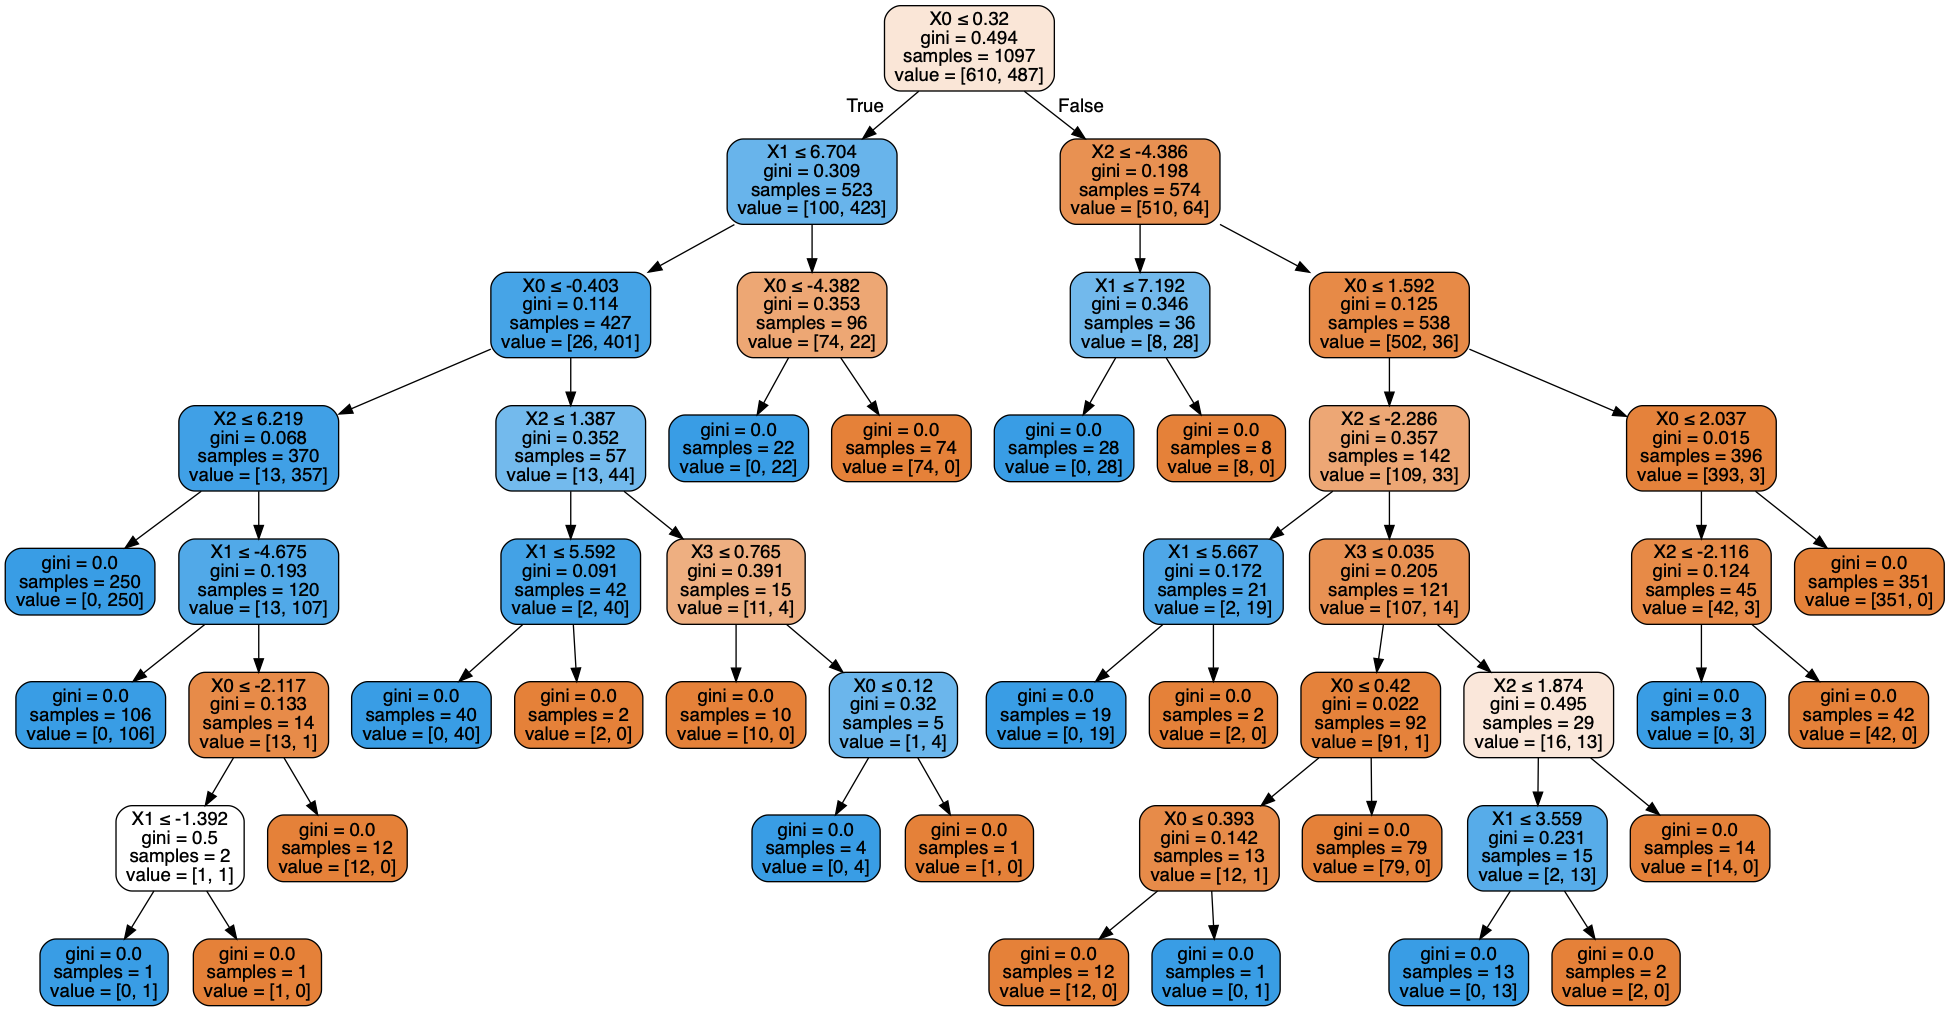

In [11]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Model may be very accurate, but the complexity of the tree makes the results difficult to interpret. While it may not be overfitted, building any type of strategy may not be possible.

## Bonus: Re-grow the Tree Using Entropy 

SO in the above example, we used all default settings for decision tree classifier. The default impurity crietrion in scikit learn is the Gini impurity. We can change it back to entropy by passing in `criterion='entropy'` argument to the classifier in the training phase. 
- Repeat the above tasks for training, evaluation and visualization using Entropy measure. (
- Compare and interpret the results 

Accuracy Score: 0.9964
AUC Score: 0.9967

Confusion Matrix
----------------
Predicted    0    1  All
True                    
0          151    1  152
1            0  123  123
All        151  124  275


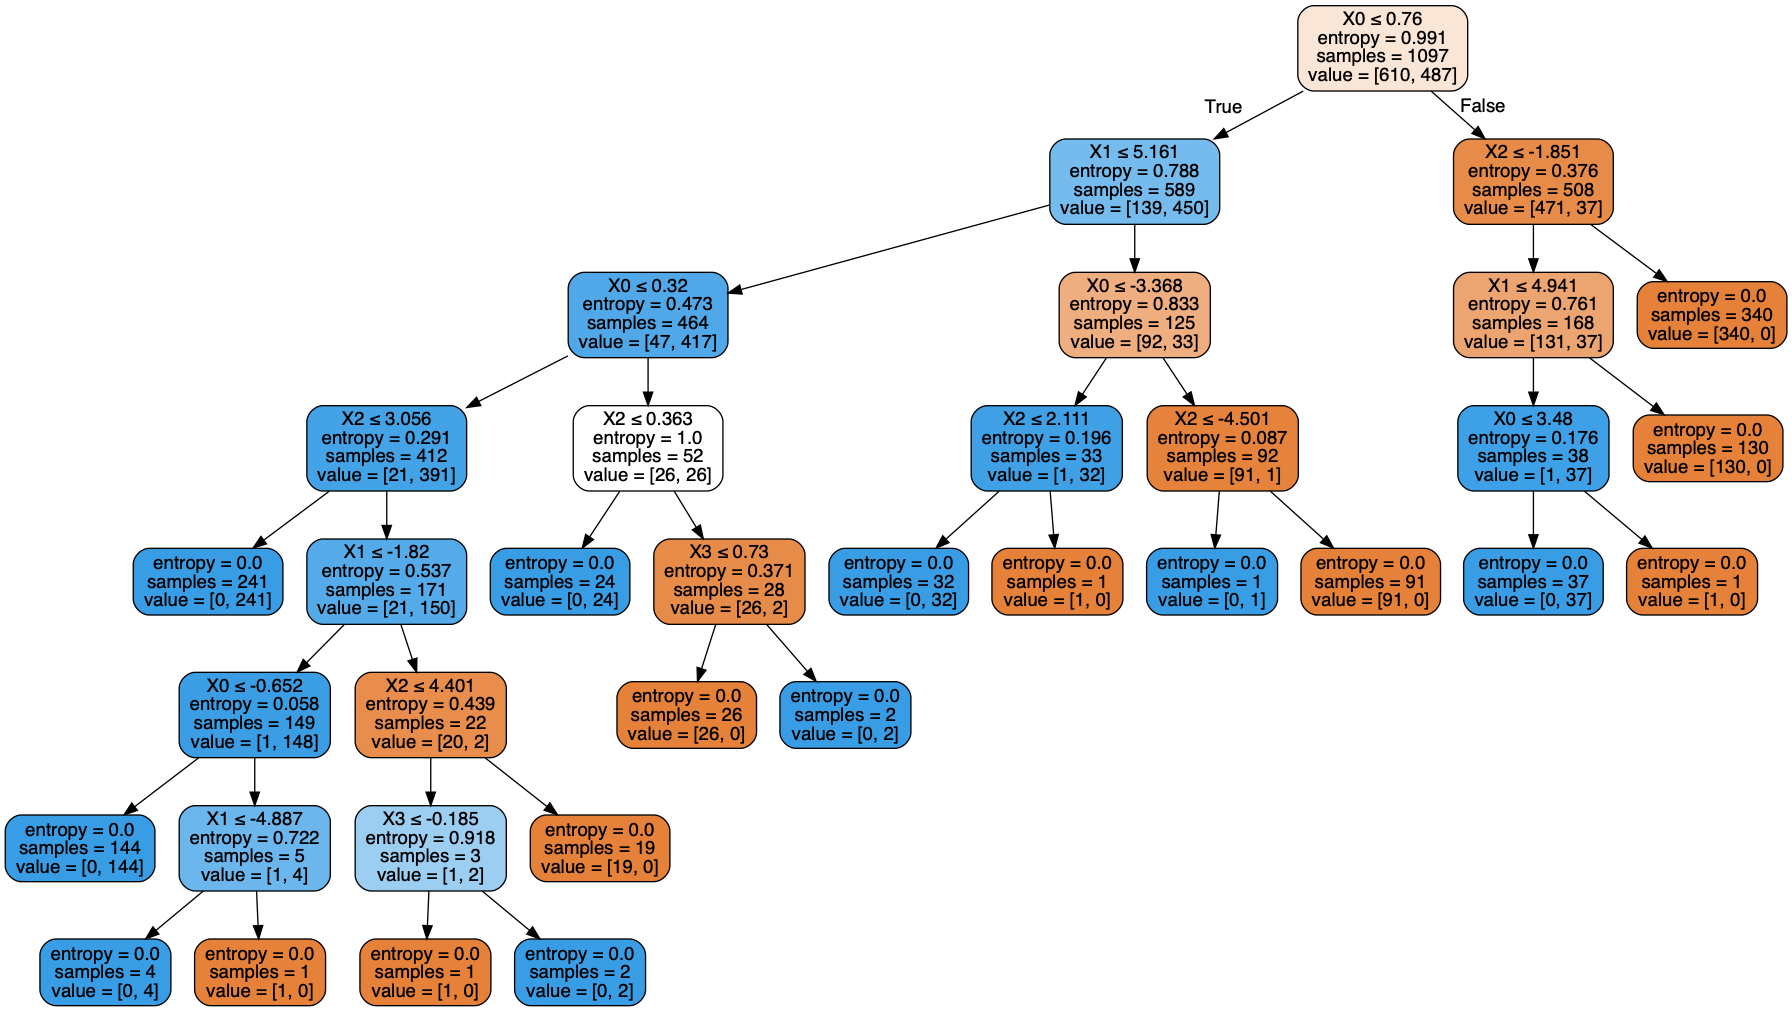

In [12]:
def build_dec_tree(X, y, crit = 'gini', ts=.2, rs=10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=rs)
    
    clf = DecisionTreeClassifier(random_state=rs, criterion=crit)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_score = auc(fpr, tpr)
    
    print(f'Accuracy Score: {accuracy:.4f}')
    print(f'AUC Score: {auc_score:.4f}')
    print('\nConfusion Matrix\n----------------')
    print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
    
    dot_data = StringIO()
    export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())
    
build_dec_tree(X, y, crit='entropy')

With entropy we see a much higher accuracy and AUC than earlier. Only one false positive value, leading to accuracy of 99%. The tree shape changes considerably with change in impurity criteria.

## Level up - Optional 

- We discussed earlier that decision trees are very sensitive towards outliers. Try to identify and remove/fix any possible outliers in the dataset. 
- Check the distributions of the data. Is there any room for normalization/scaling of data ? Apply these techiques and see if it improves upon accuracy score. 

In [13]:
import matplotlib.pyplot as plt
from scipy import stats
import warnings

warnings.simplefilter('ignore')

df = pd.read_csv('data_banknote_authentication.csv', 
            header=None, 
            names=['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'])


# Drop Outliers (>3 Standard Deviations from Mean)
df_ = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

# Min-Max Scale
for col in df.columns[:-1]:
    df_[f'{col}_'] = (max(df_[col]) - df_[col]) / (max(df_[col]) - min(df_[col]))
    
df_cleaned = df_[df_.columns[4:]]

y = df_cleaned['Class']
X = df_cleaned[df_cleaned.columns[1:]]

df_cleaned.head()

,Class,Variance_,Skewness_,Curtosis_,Entropy_
0,0,0.230996,0.163329,0.867859,0.294114
1,0,0.164341,0.182335,0.849271,0.397189
2,0,0.213371,0.594161,0.615631,0.237917
3,0,0.242895,0.130678,0.932037,0.613706
4,0,0.468422,0.663407,0.474492,0.349130


In [14]:
df_cleaned.describe()

,Class,Variance_,Skewness_,Curtosis_,Entropy_
count,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000
mean,0.437874,0.453097,0.415590,0.654507,0.360832
std,0.496311,0.201338,0.212704,0.210600,0.203079
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.284494,0.235921,0.553511,0.206798
50%,0.000000,0.451055,0.404652,0.688510,0.305801
75%,1.000000,0.612482,0.547456,0.806380,0.473706
max,1.000000,1.000000,1.000000,1.000000,1.000000


Accuracy Score: 0.9851
AUC Score: 0.9833

Confusion Matrix
----------------
Predicted    0    1  All
True                    
0          156    1  157
1            3  108  111
All        159  109  268


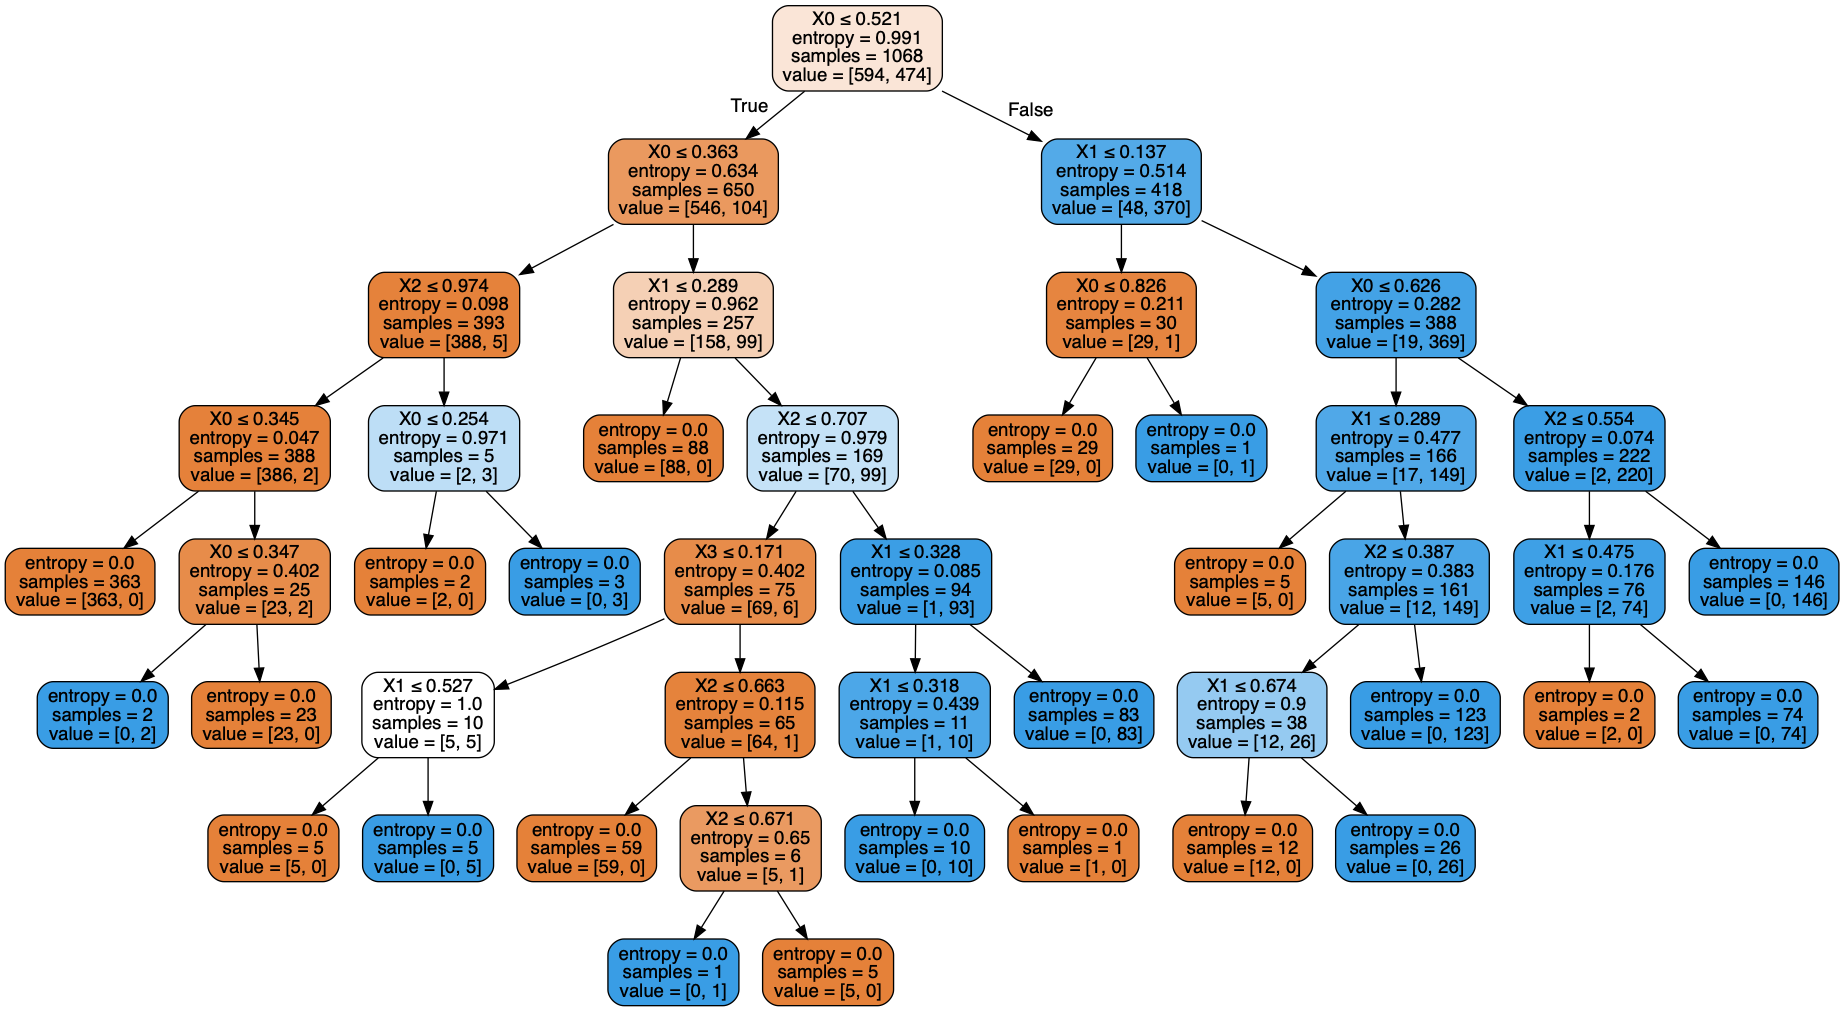

In [15]:
build_dec_tree(X, y, crit='entropy')

## Summary 

In this lesson, we looked at growing a decision tree for banknote authentication dataset which is composed of extracted continuous features from photographic data. We looked at different stages of the experiment including data acquisition, training, prediction and evaluation. We also looked at growing trees using entropy vs. gini impurity criteria. In following lessons, we shall look at some more such pre-train tuning techniques for ensuring an optimal classifier for learning and prediction.  